**Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=4, releaselevel='final', serial=0)

**Loading Data**

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Getting to know the dataset**

In [5]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

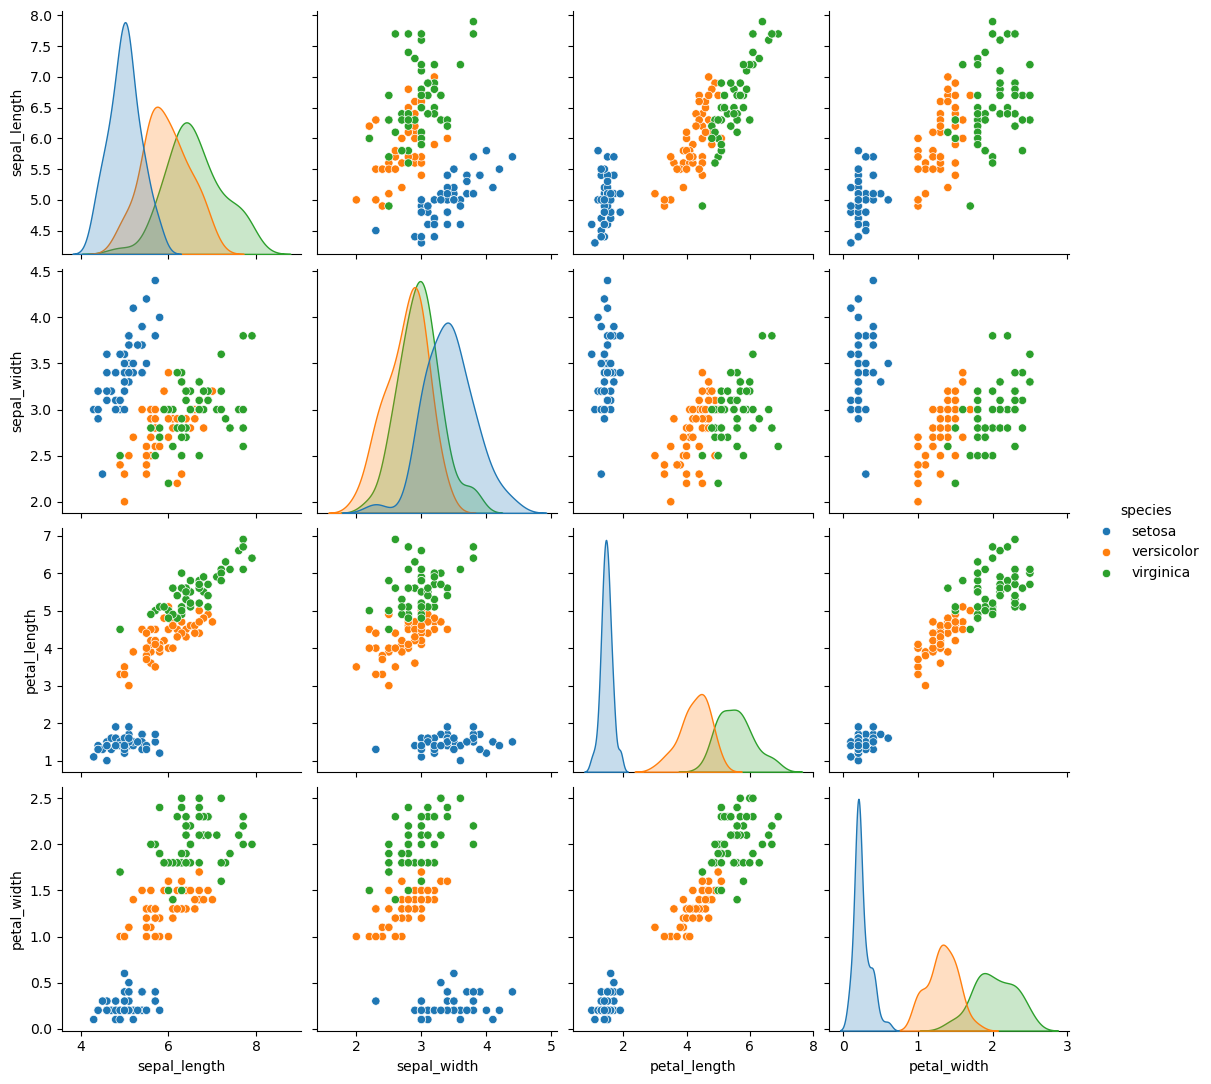

In [7]:
sns.pairplot(df,hue='species', height=2.75);

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df['species_num'] =df.species.map({'setosa':1,'versicolor':2,'virginica':3})

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


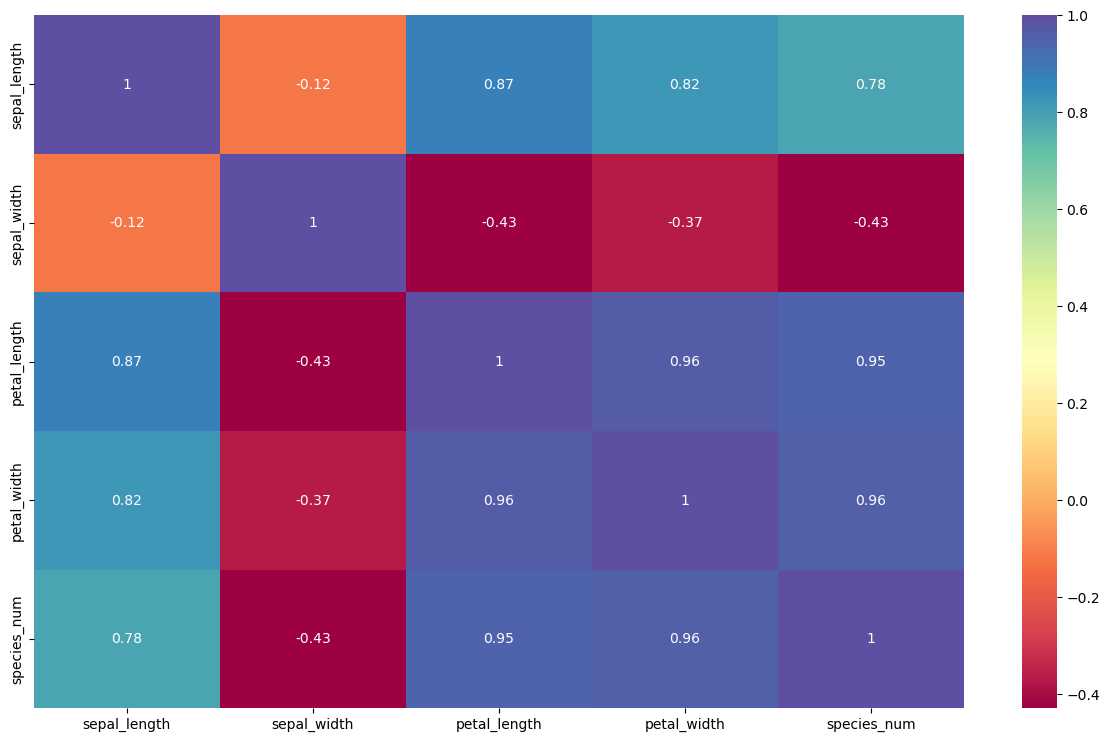

In [12]:
plt.figure(figsize=(15,9))
sns.heatmap(df.drop(['species'],axis=1).corr(),cmap='Spectral',annot=True);

In [13]:
# dropping petal length because of high correlation with petal width and since it is the least correlated with species
df.drop(['petal_length','species_num'],axis=1,inplace=True) 

In [14]:
df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


##### Decision Tree is not an algorithm that depends on standardization so we can just proceed to modelling

In [15]:
X = df.drop(['species'],axis=1)
y = df.species

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
from sklearn import tree

In [21]:
list(df.columns[:-1])

['sepal_length', 'sepal_width', 'petal_width']

In [22]:
features =  list(df.columns[:-1])
target = df.species.unique()
print(features)
print(target)

['sepal_length', 'sepal_width', 'petal_width']
['setosa' 'versicolor' 'virginica']


In [23]:
from sklearn.model_selection import GridSearchCV

**Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_model = RandomForestClassifier()

In [29]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = rf_model.predict(X_test)

In [31]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

Accuracy Score:  0.9736842105263158


In [32]:
cv_scores = cross_val_score(estimator=rf_model, X=X_train, y=y_train,cv=10)
cv_scores.mean()

0.9098484848484848

In [33]:
cm = confusion_matrix(y_test,y_pred)
xt = df.species.unique()
yt= df.species.unique()

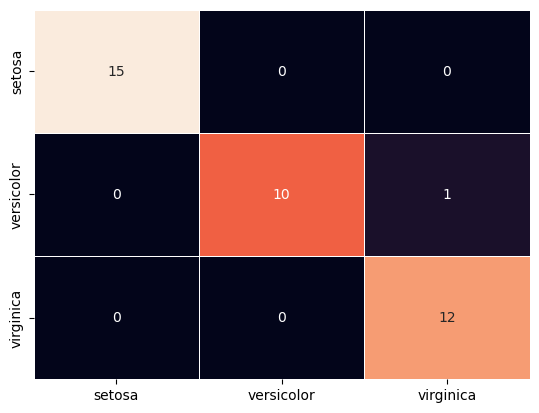

In [34]:
sns.heatmap(cm,
            #cmap='YlGnBu',
            annot=True,
            cbar=False,
            xticklabels=xt,
            yticklabels=yt,
            lw=.5);

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [36]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1207216046),
 DecisionTreeClassifier(max_features='sqrt', random_state=1139875116),
 DecisionTreeClassifier(max_features='sqrt', random_state=1312620607),
 DecisionTreeClassifier(max_features='sqrt', random_state=264977410),
 DecisionTreeClassifier(max_features='sqrt', random_state=935951964),
 DecisionTreeClassifier(max_features='sqrt', random_state=2134102538),
 DecisionTreeClassifier(max_features='sqrt', random_state=1639710392),
 DecisionTreeClassifier(max_features='sqrt', random_state=6586358),
 DecisionTreeClassifier(max_features='sqrt', random_state=1743656085),
 DecisionTreeClassifier(max_features='sqrt', random_state=1253317616),
 DecisionTreeClassifier(max_features='sqrt', random_state=2022758193),
 DecisionTreeClassifier(max_features='sqrt', random_state=416232059),
 DecisionTreeClassifier(max_features='sqrt', random_state=448145467),
 DecisionTreeClassifier(max_features='sqrt', random_state=1678148547),
 DecisionTree

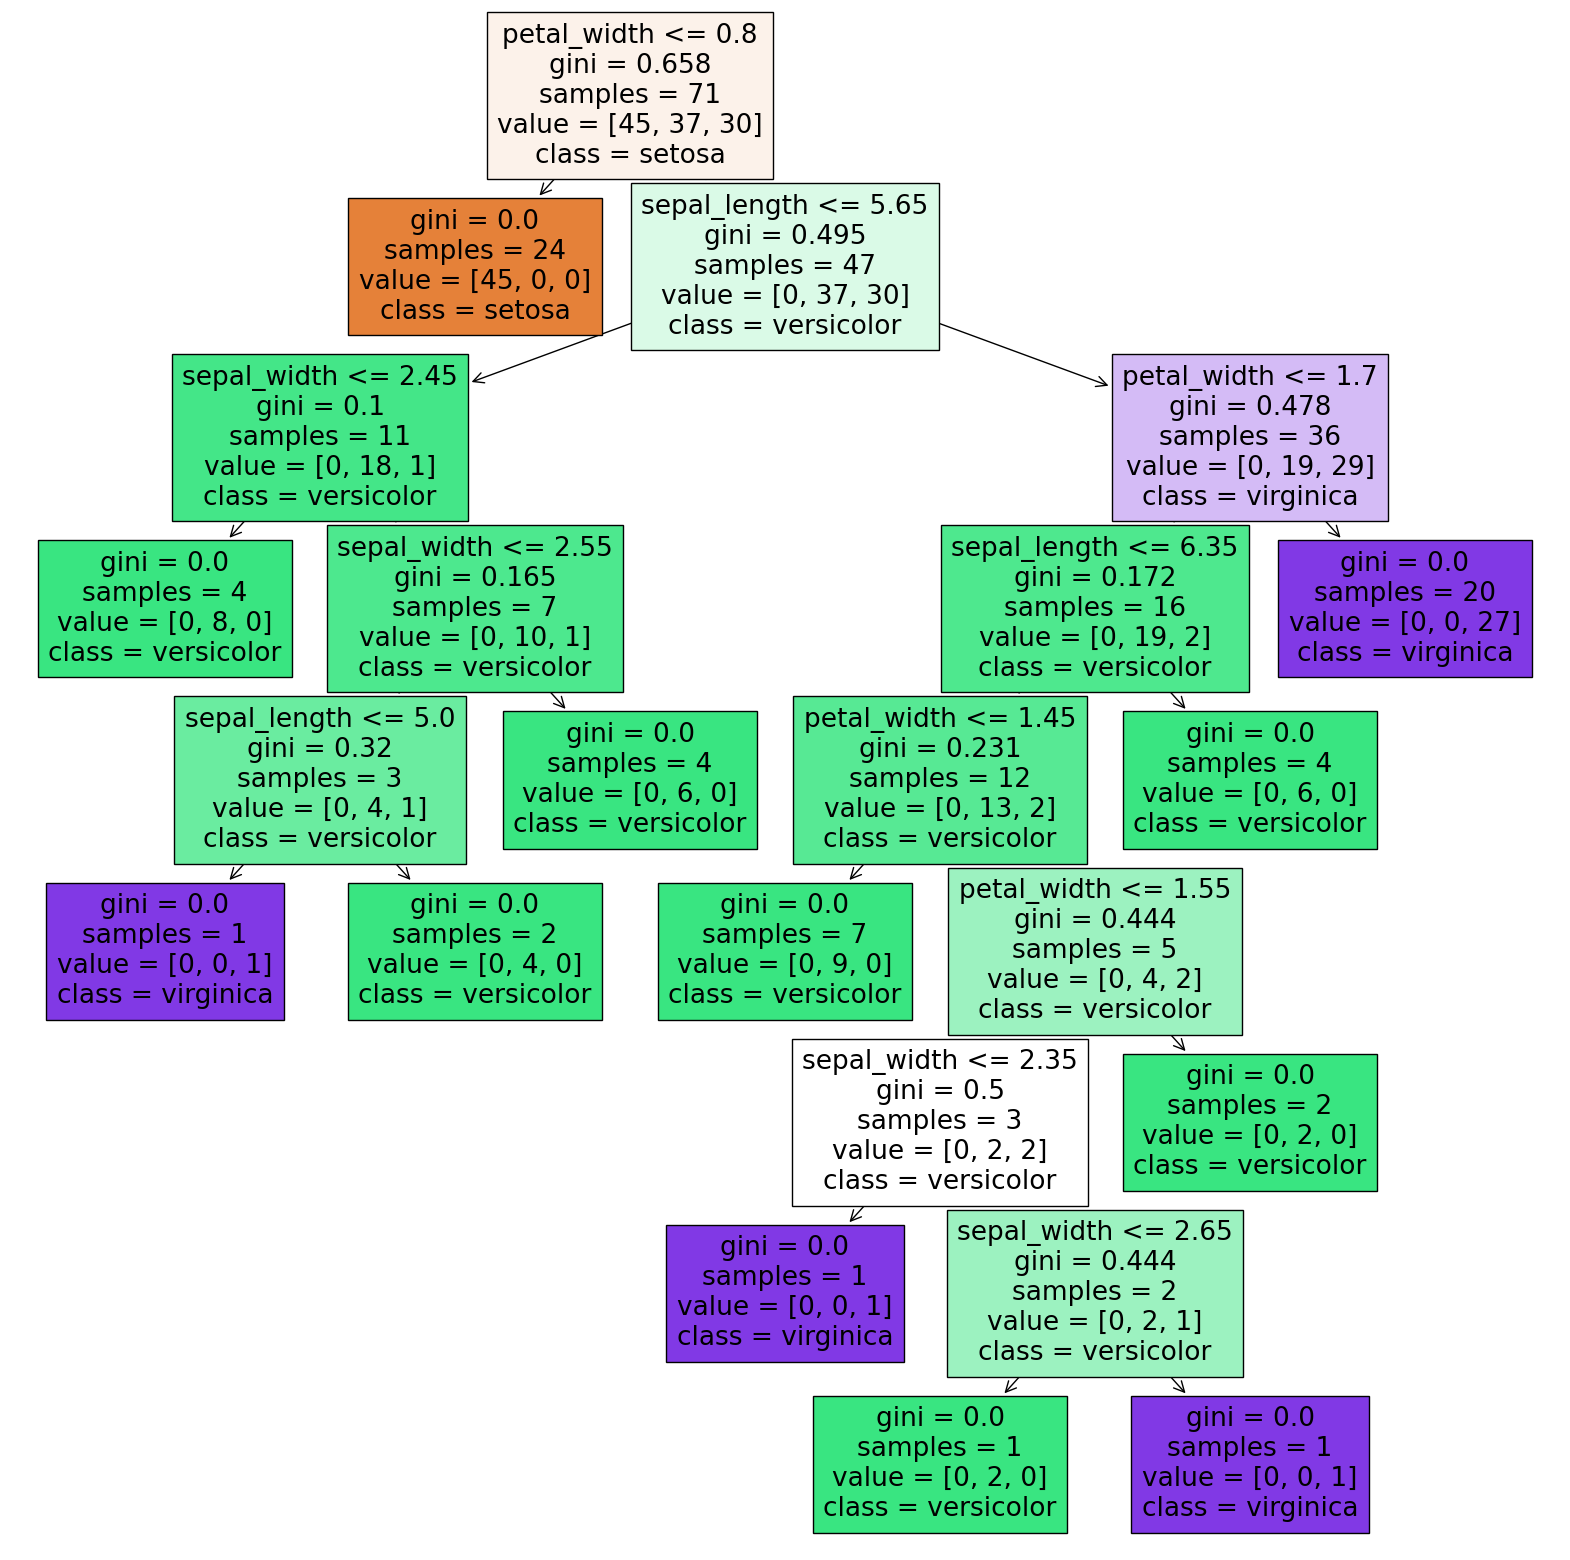

In [37]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(rf_model.estimators_[1], 
                       filled=True, 
                       feature_names=features,
                       class_names=target)

**Hyperparameter Optimization With Python**

In [38]:
rf_model2 = RandomForestClassifier()

In [39]:
params = {
    'n_estimators':[50,100,300],
    'max_depth':[3,5,7,],
    'min_samples_split':[2,4,6],

    'max_features':[2, 4,6,8 ],
}

In [40]:
rf_cv_model = GridSearchCV(estimator=rf_model2,param_grid=params, cv=5, n_jobs=-1)

In [41]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

In [42]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [43]:
rf_tuned = RandomForestClassifier(max_depth= 3,
 max_features= 2,
 min_samples_split= 4,
 n_estimators= 50
)

In [44]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=2, min_samples_split=4,
                       n_estimators=50)

In [45]:
y_pred = rf_tuned.predict(X_test)

In [46]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

Accuracy Score:  1.0


In [47]:
cv_scores = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train,cv=10)
cv_scores.mean()

0.9371212121212119

In [48]:
cm = confusion_matrix(y_test,y_pred)
xt = df.species.unique()
yt= df.species.unique()

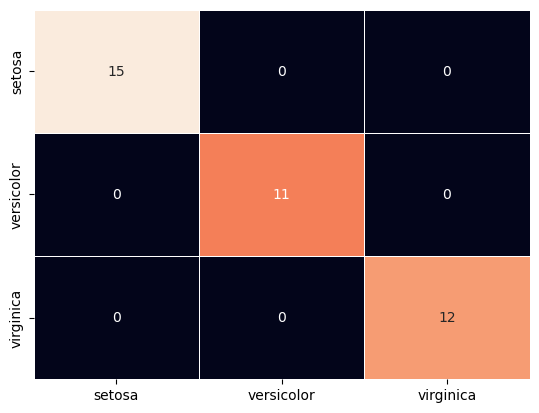

In [49]:
sns.heatmap(cm,
            #cmap='YlGnBu',
            annot=True,
            cbar=False,
            xticklabels=xt,
            yticklabels=yt,
            lw=.5);

In [50]:
rf_tuned.feature_importances_

array([0.16170708, 0.02614532, 0.8121476 ])

In [51]:
best_features = pd.Series(rf_tuned.feature_importances_,index=df.columns[:-1]).sort_values(ascending=False)
best_features

petal_width     0.812148
sepal_length    0.161707
sepal_width     0.026145
dtype: float64

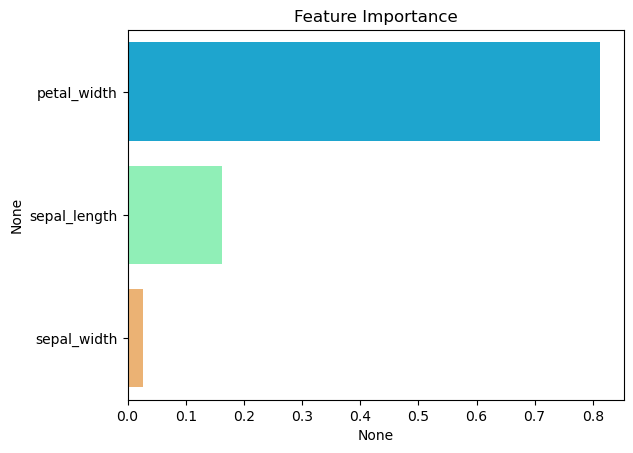

In [52]:
sns.barplot(x=best_features, y=best_features.index,palette='rainbow')
plt.title('Feature Importance')
plt.show()
